# Marketing-Mix Sales Analysis with Python

The goal of the project is to solve the marketing attribution problem.It aims to predict how much each marketing channel is contributed to the sales of the business.The problem becomes complex when the market channels are offline channels like TV,radio.

<a id='home'></a>

**Table Of Contents**
    
1. Package Libs Imports
2. Class definitions for
    1. [Data Loading](#2A)
    2. [Plotting Graphs](#2B)
    3. [EDA](#2C)
    4. [Feature Selection](#2D)
    5. [Develpment of Regression model](#2E)
    6. [Regression model Evaluation](#2F)
3. [Importing and Splitting of data](#3)
4. [EDA & Preprocessing](#4)
5. [Feature Importance](#5)
6. [Regression Model Build](#6)
7. [Model Evaluation](#7)
    

## 1. Package Libs Imports

In [3]:
# Basic pacakeges

import numpy as np
import pandas as pd


# Data Viz Packages

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


# SKLearn imports

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae

# Import for OLS

import statsmodels.formula.api as sm

## 2. Class Definitions

<a id='2A'></a>
### 2.1 Data Loading & Splitting

In [4]:
class dataImportAndSplit:
    
    def __init__(self, file): 
        ''' This class is created to import and load the original data file and split into training and test data
        in the ratio of 80:20 
    
        This class accepts input the original dataset and output file would test and train file'''
        self.file= file
        self.process_data()
    
    def process_data(self):
        self._data_import()
        self._split_train_test(self.df)
        
    def _data_import(self):
        ''' This function is used to load the data'''    
        self.df=self._load_csv(file)
        print('Data is loaded successfully into attribute .df')
        print('------------------------------------------------------------------------------------------')

    def _load_csv(self,file):
        ''' The function will load the csv file into a dataframe'''
        return pd.read_csv(file)
    
    def _split_train_test(self,df):
        ''' This function will split the dataframe into train and test files'''    
        train, test = train_test_split(df, test_size=0.2)
        self.train=train
        self.test=test
        print("Successfully splitted training and test data in 80:20 ratio into attributes .train / .test")
        print('------------------------------------------------------------------------------------------')

In [5]:
file = "data/advertising.csv"

<a id='2B'></a>

### 2.2 Graph Plotting

[Back to home](#home)

In [6]:
class plotGraph:
    
    ''' Class that plot graphs '''
    
    def __init__(self):
        self.setStyle()

    def setStyle(self, style = 'white'):
        sns.set(style = style)
    
    def plotBarText(self, df, fig, title, xLabel, xTicks, xLabelFS = 10,
                    xTicksFS = 12, plotC = 'b', barW = 0.65, barTxtFS = 10):
        
        ''' Process that draw a tuned bar plot with text above the bars '''
        
        _ = plt.bar(xTicks, df.iloc[:, 0], width = barW, color = plotC, alpha = 0.75)
        plt.title(title, fontsize = 14, fontweight = 450)
        plt.xlabel(xLabel, fontsize = xLabelFS)
        plt.tick_params(top=False,bottom=False,left=False,right=False,labelleft=False,labelbottom=True)
        plt.xticks(fontsize = xTicksFS)
        plt.grid(b=False)
        b,t = plt.ylim()
        plt.ylim(top=(t*1.075))
        for spine in plt.gca().spines.values():
            spine.set_visible(False) if spine.spine_type !='bottom' else spine.set_visible(True)
        for bar in _:
            height = bar.get_height()
            txtHeight = str(np.around(height,decimals=2))+'%'

            plt.gca().text(bar.get_x() + bar.get_width()/1.85, (bar.get_height()+0.85), txtHeight,
                           ha='center', color='black', fontsize=barTxtFS)
    
    def plotKDE(self, fig, title, kde, featureD, labels, 
                colors = ['b', 'g'], legLoc = 0, legFS = 12, titleFS = 15):
        
        ''' Process that draw KDE plots '''
        
        ax=sns.kdeplot(kde[0], color=colors[0], shade=True, label= labels[0])
        ax=sns.kdeplot(kde[1], color=colors[1], shade=True, label= labels[1])
        plt.title('{} {}'.format(featureD, title), fontsize = titleFS)
        plt.tick_params(top=False, bottom=True, left=True, right=False)
        if legLoc == 0 :
            plt.legend(frameon=False, loc = legLoc, fontsize = legFS)
        else :    
            plt.legend(frameon=False, bbox_to_anchor=(legLoc), fontsize = legFS)
        plt.tight_layout()
    
    def plotCorr(self, corr, title, figSize = [5,5], titleFS = 15, cmap = 'blues', annot = True, 
                square = True, fmt = '.2f', vMM = [-1,1], lineW = 0.25, cbarD = {}, rot = 90,
                annD = {}, ticksFS = 10, yLim = [0.0,0.0]):
        
        ''' Process that plot a correlation matrix '''

        mask = np.zeros_like(corr, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True
        f, ax = plt.subplots(figsize=(figSize))
        ax.set_title(title, fontdict={'fontsize': titleFS})
        sns.heatmap(corr, annot = annot, mask=mask, cmap=cmap, vmin=vMM[0], vmax=vMM[1],
                    center=0, fmt=fmt, annot_kws=annD, square=True, linewidths=lineW, 
                    cbar_kws=cbarD)
        plt.xticks(fontsize = ticksFS, rotation = rot, ha = 'right')
        plt.yticks(fontsize = ticksFS)
        plt.title(title, fontsize = titleFS)
        b,t = plt.ylim()
        plt.ylim(bottom=(b*yLim[0]), top = (t*yLim[1]))
        
    def plotBox(self, df, fig):
        ax = sns.boxplot(df, orient = 'h', palette = "muted")
        
    def plotBarH(self, X, y, fig, title, width, nType = '', symbol = '', 
                 fontS = 10, plotC = 'b', sep = [1,2]):
        
        ''' Process that draw a tuned horizontal bar plot with text on the bars '''
        
        self.setStyle('white')
        br = plt.barh(X, y, color = plotC, alpha = 0.7)
        plt.title(title, fontsize = 13, y = 1.05)
        plt.yticks(fontsize = 11)
        plt.xticks(fontsize = 0)
        plt.rcParams['axes.facecolor'] = 'white'
        l, r = plt.xlim()
        plt.xlim(left=(y.min()*0.6))
        plt.tick_params(top=False, bottom=False, left=False, right=False,
                        labelleft=True, labelbottom=False)
        
        for spine in plt.gca().spines.values():
            spine.set_visible(False)

        for bar in br:
            width = bar.get_width()
            sepN = sep[0] if width < 100 else sep[1]
            width  = str('{0:.0f}'.format(width)) + symbol
            plt.gca().text((bar.get_width()-sepN), bar.get_y() + bar.get_height()/3.25, str(width),
                           ha='center', color='black', fontsize=fontS)
            
    def plotConfMatrix(self, clfN, yTest, yPred, target_names, title='Confusion matrix', 
                       cmap=None, figSize = [8,6], normalize=True):
        
        ''' Process that draw the confussion matrix for given predictions '''
        
        cm = confusion_matrix(yTest, yPred)
        accuracy = np.trace(cm) / float(np.sum(cm))
        misclass = 1 - accuracy
        fig = plt.figure(figsize=(figSize))
        if cmap is None: cmap = plt.get_cmap('Blues')
        if normalize: cm = (cm.astype('float')*100) / cm.sum(axis=1)[:, np.newaxis]

        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, cmap=cmap)
        if normalize : fig.colorbar(cax, ticks=np.arange(0,101,20))
        else : fig.colorbar(cax)
        ax.set_xticklabels([''] + target_names)
        ax.set_yticklabels([''] + target_names)
        plt.tick_params(axis='both', which='major', length=0)
        plt.ylabel('True', fontsize = 12)
        plt.xlabel('Predicted', fontsize = 12)
        thresh = cm.max() / 1.5 if normalize else cm.max() / 2
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            if normalize: plt.text(j, i, "{:0.2f}%".format(cm[i, j]),
                                horizontalalignment="center",
                                color="white" if cm[i, j] > thresh else "black",
                                fontweight = 568, fontsize = 12)
            else: plt.text(j, i, "{:,}".format(cm[i, j]),
                           horizontalalignment="center",
                           color="white" if cm[i, j] > thresh else "black",
                           fontweight = 568, fontsize = 12)
        plt.tight_layout()
        ax.xaxis.set_label_coords(0.5, -0.075)
        
        # Print scores
        ax.text(2.55,-0.45,'== '+clfN+' ==',fontsize=12)
        ax.text(2.55,-0.20,'Accuracy: '+str(round(accuracy_score(yTest, yPred),4)),fontsize=12)
        ax.text(2.55,0.0,'Precision: '+str(round(precision_score(yTest, yPred),4)),fontsize=12)
        ax.text(2.55,0.2,'Recall: '+str(round(recall_score(yTest, yPred),4)),fontsize=12)
        ax.text(2.55,0.4,'F1: '+str(round(f1_score(yTest, yPred),4)),fontsize=12)
        
    def plotFeatImp(self, X, Y, fig, title, xLabel, xLabelFS = 10, rot = 45,
                    xTicksFS = 11, plotC = 'b', barW = 0.9, barTxtFS = 11, simb = ''):
        
        ''' Process that draw bar plot for the feature importance '''
        
        _ = plt.bar(X, Y, width = barW, color = plotC)
        plt.title(title, fontsize = 15, fontweight = 450)
        plt.xlabel(xLabel, fontsize = xLabelFS)
        plt.tick_params(top=False,bottom=False,left=False,right=False,labelleft=False,labelbottom=True)
        plt.xticks(fontsize = xTicksFS, rotation = rot, ha = 'right')
        plt.grid(b=False)
        b,t = plt.ylim()
        plt.ylim(top=(t*1.075))
        for spine in plt.gca().spines.values():
            spine.set_visible(False) if spine.spine_type !='bottom' else spine.set_visible(True)
        i = 0
        for bar in _:
            if str(X.iloc[i])[:5] == 'basic':
                bar.set_color('g')
            elif str(X.iloc[i])[:5] == 'tfidf':
                bar.set_color('b')
            else:
                bar.set_color('r')  
            i = i +1
            height = bar.get_height()
            txtHeight = str(np.around(height,decimals=2))+simb
            plt.gca().text(bar.get_x() + bar.get_width()/1.85, (bar.get_height()+0.01), txtHeight,
                           ha='center', color='black', fontsize=barTxtFS)
        colors = {'Basic':'g', 'TF-IDF':'b', 'CountV' : 'r'}         
        labels = list(colors.keys())
        handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
        plt.legend(handles, labels)

<a id='2C'></a>
### 2.3 EDA
[Back to home](#home)

In [7]:
class prepocess_EDA:
    
    def __init__(self,data):
        ''' This class is used to explore more about the data and handle the outliers and preprocess data'''
        self.data=data
        self.train=data.train
        self.test=data.test
        self._clean_data()
        self._explore_()
        self._correlation_analysis()
        self._explore_cols()
    
    def _clean_data(self):
        '''This function elimnates the default column which has row number which is not needed'''
        # self.train=self.train.copy().drop(['Unnamed: 0'],axis=1)
        # self.test=self.test.copy().drop(['Unnamed: 0'],axis=1)
        print('No actions were performed in _clean_data procedure')
        
    def _explore_(self):
        '''This function describes about the columns present in the data and snippet of actual data'''
        print('Columns in the dataframe are :')
        print(self.train.columns.tolist())
        print('--------------------------------')
        print(self.train.describe())
        
    def _correlation_analysis(self):
        '''This function provides the correlation analysis '''
        corr = self.train.corr()
        CorrCmap = sns.diverging_palette(10, 240, as_cmap=True)
        
        
        plotGraph.setStyle('whitegrid')
        
        plotGraph.plotCorr(self, corr = corr, title='Correlation Heatmap', figSize = [6,6], titleFS = 14,
            cmap = CorrCmap, lineW = 0.2, cbarD = {"shrink": .35, "ticks":[-1, -0.5, 0, 0.5,1]},
            annD = {'size': 10.5, 'weight' : 'bold'}, yLim = [1,0.0], rot=45)
        
        #fig = plt.figure(figsize=(12,6))
        #sns.heatmap(corr, xticklabels=corr.columns,
        #                  yticklabels=corr.columns,
        #                  annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
    
    def _explore_cols(self):
        '''This function  plots the relationship between the dependent and independent variables'''
                 
        sns.pairplot(self.train)

<a id='2D'></a>

### 2.4 Feature Selection

[Back to home](#home)

In [8]:
class feaure_select:
    def __init__(self,data):
        ''' This class is used to explore more about the data and handle the outliers and preprocess data'''
        self.data=data
        self.train=data.train
        self.test=data.test
        self.set_vars()
        self.rand_frst_model()
        self.feature_select()
        
        
    def set_vars(self):
        self.train=self.train.copy()
        self.X_train = self.train.loc[:, self.train.columns != 'Sales']
        self.y_train = self.train['Sales']
    
    def rand_frst_model(self):
        self.model = RandomForestRegressor(random_state=1)
        self.model.fit(self.X_train, self.y_train)
        pred = self.model.predict(self.X_train)
        
    def feature_select(self):
        self.feat_importances = pd.Series(self.model.feature_importances_, index=self.X_train.columns)
        self.feat_importances.nlargest(25).plot(kind='barh',figsize=(6,6))

<a id='2E'></a>

### 2.5 Regression Model Development

[Back to home](#home)

In [9]:
class model_build:
    def __init__(self,data):
        ''' This class is used to build the linear regression model based on OLS'''
        self.data=data
        self.train=data.train
        self.test=data.test
        self.model_bld()
        
        
    def model_bld(self):
        self.model = sm.ols(formula="Sales~TV+Radio+Newspaper", data=self.train).fit()
        print(self.model.summary())

<a id='2F'></a>

### 2.6 Regression Model Evaluation

[Back to home](#home)

In [10]:
class evaluate:
    def __init__(self,data,model_bld):
        ''' This class is used to evaluate the accuracy of the model using the test data'''
        self.data=data
        self.df=data.df
        self.train=data.train
        self.test=data.test
        self.model=model_bld.model
        self.predict()
        self.predict_plot()
    
    def predict(self):
        '''This class is used to  predict the values in the test data using the trained model'''
        self.model = sm.ols(formula="Sales~TV+Radio+Newspaper", data=self.train).fit()
        self.y_pred = self.model.predict(self.test)
        self.labels = self.test['Sales']
        self.df_temp = pd.DataFrame({'Actual': self.labels, 'Predicted':self.y_pred})
        self.df_temp = self.df_temp.reset_index()
    
    def predict_plot(self):
        ''' This class is used to visualize the plot of actual and predicted values  '''
        figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
        self.y1 = self.df_temp['Actual']
        self.y2 = self.df_temp['Predicted']
        plt.plot(self.y1, label = 'Actual Sales')
        plt.plot(self.y2, label = 'Predicted Sales')
        plt.title("Prediction results over test set (40 observations)")
        plt.legend()
        plt.show()

<a id='3'></a>

## 3. Importing and splitting the data

[Back to home](#home)

In [11]:
data=dataImportAndSplit(file)

Data is loaded successfully into attribute .df
------------------------------------------------------------------------------------------
Successfully splitted training and test data in 80:20 ratio into attributes .train / .test
------------------------------------------------------------------------------------------


<a id='4'></a>

## 4. EDA & Preprocessing

[Back to home](#home)

No actions were performed in _clean_data procedure
Columns in the dataframe are :
['TV', 'Radio', 'Newspaper', 'Sales']
--------------------------------
               TV       Radio   Newspaper       Sales
count  160.000000  160.000000  160.000000  160.000000
mean   145.989375   23.048125   29.658125   13.961250
std     84.622956   14.848357   20.752257    5.189115
min      0.700000    0.000000    0.300000    1.600000
25%     75.250000    9.975000   12.275000   10.400000
50%    148.550000   22.400000   25.750000   12.900000
75%    215.650000   36.375000   43.225000   17.225000
max    296.400000   49.600000  114.000000   27.000000


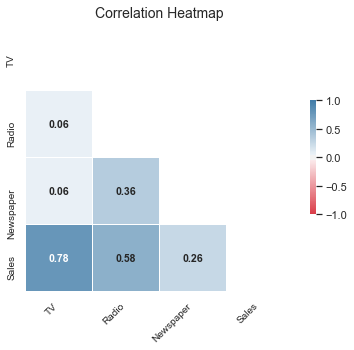

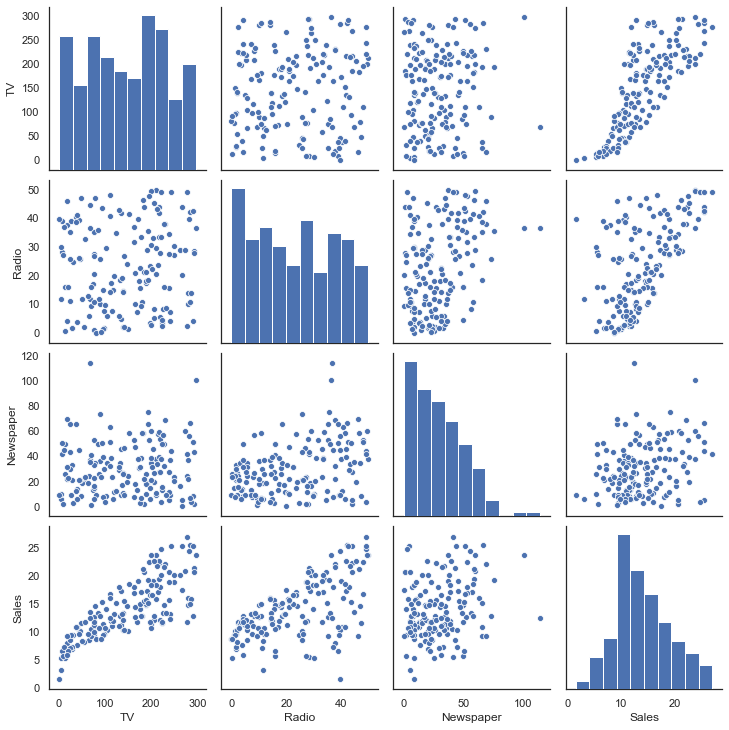

In [12]:
prepocess_EDA(data)

<a id='5'></a>

## 5. Feature Importance

[Back to home](#home)

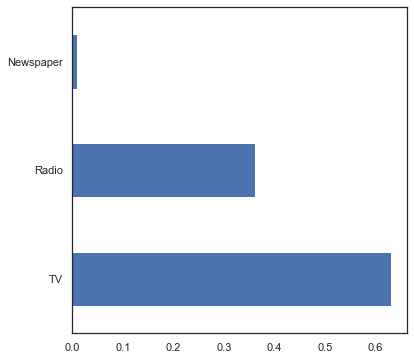

In [13]:
feaure_select(data);

<a id='6'></a>

## 6. Regression Model Build

[Back to home](#home)

In [14]:
model_bld=model_build(data)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     448.1
Date:                Tue, 27 Oct 2020   Prob (F-statistic):           2.00e-76
Time:                        16:57:34   Log-Likelihood:                -308.90
No. Observations:                 160   AIC:                             625.8
Df Residuals:                     156   BIC:                             638.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8525      0.350      8.157      0.0

<a id='7'></a>

## 7. Assessing the outputs for test dataset

[Back to home](#home)

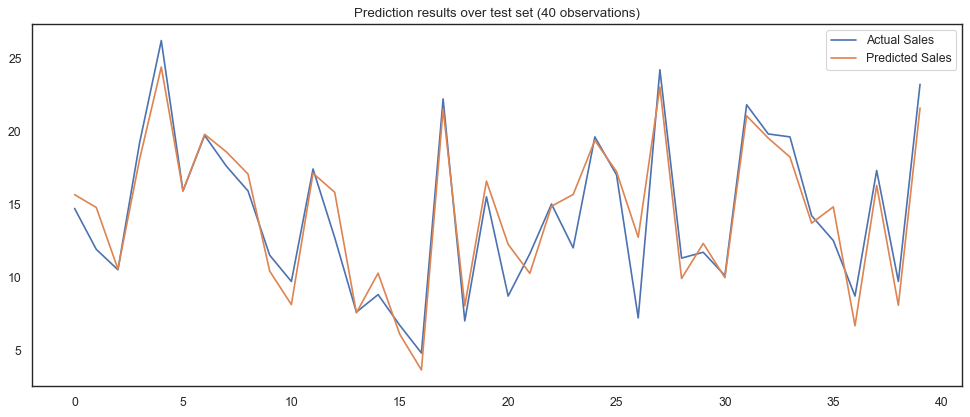

In [15]:
evaluate(data,model_bld);